In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
import pandas as pd
station_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["visibility_o"].describe()

                     Unnamed: 0.1      temp_o  tempd_o    rh_o  dir_o  \
time                                                                    
2018-09-08 03:30:00        187900  291.150001   288.15   82.62  240.0   
2018-09-08 04:00:00        187901  291.150001   288.15   82.62  230.0   
2018-09-08 04:30:00        187902  291.150001   288.15   82.62  220.0   
2018-09-08 05:00:00        187903  290.149999   288.15   88.00  230.0   
2018-09-08 05:30:00        187904  290.149999   288.15   88.00  200.0   
...                           ...         ...      ...     ...    ...   
2020-12-24 21:30:00        229245  278.150000   278.15  100.00   50.0   
2020-12-24 22:00:00        229246  278.150000   277.15   93.24   60.0   
2020-12-24 22:30:00        229247  278.150000   277.15   93.24   80.0   
2020-12-24 23:00:00        229248  278.150000   277.15   93.24   30.0   
2020-12-24 23:30:00        229249  278.150000   277.15   93.24   40.0   

                        spd_o wind_gust_o  mslp_o 

count    41312.000000
mean      8167.830170
std       3302.760811
min         48.000000
25%       7998.000000
50%       9994.000000
75%       9994.000000
max       9994.000000
Name: visibility_o, dtype: float64

In [10]:
#resample visibility minor hour before
station = station_all[["visibility_o","temp_o"]].resample("H",label="right",closed="right").min()


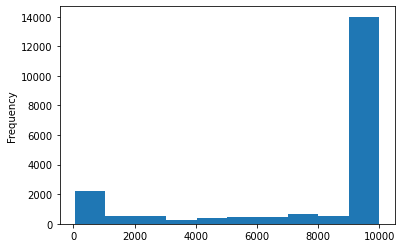

In [6]:
from locale import normalize
#station.value_counts()
station["visibility_o"].plot.hist();

In [11]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels = ['<= 1000 m', '> 1000 m']
station["vis_l"] = pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station = station.drop(columns=["temp_o"])
station.sample(20)

,visibility_o,vis_l
time,,
2019-02-22 21:00:00,9994.0,> 1000 m
2019-08-23 19:00:00,9994.0,> 1000 m
2020-05-15 20:00:00,9994.0,> 1000 m
2018-09-08 06:00:00,9994.0,> 1000 m
2019-04-30 14:00:00,9994.0,> 1000 m
2019-08-01 11:00:00,9994.0,> 1000 m
2018-12-03 08:00:00,97.0,<= 1000 m
2020-05-03 08:00:00,901.0,<= 1000 m
2020-08-27 05:00:00,306.0,<= 1000 m


In [12]:
station

,visibility_o,vis_l
time,,
2018-09-08 04:00:00,9994.0,> 1000 m
2018-09-08 05:00:00,9994.0,> 1000 m
2018-09-08 06:00:00,9994.0,> 1000 m
2018-09-08 07:00:00,9994.0,> 1000 m
2018-09-08 08:00:00,9994.0,> 1000 m
...,...,...
2020-12-24 20:00:00,9994.0,> 1000 m
2020-12-24 21:00:00,9994.0,> 1000 m
2020-12-24 22:00:00,9994.0,> 1000 m


**Forecast D0**

In [15]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")
model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [16]:
#label meteorological model prec points 0 to 9
model1k["visibility0_l"] = pd.cut(model1k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["visibility1_l"] = pd.cut(model1k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [17]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["visibility_o"])
df_all1k[["vis_l","visibility0_l","visibility1_l"]].sample(20)

,vis_l,visibility0_l,visibility1_l
time,,,
2019-02-23 09:00:00,> 1000 m,> 1000 m,> 1000 m
2019-12-26 09:00:00,> 1000 m,> 1000 m,> 1000 m
2019-03-03 15:00:00,> 1000 m,> 1000 m,> 1000 m
2019-03-08 02:00:00,> 1000 m,> 1000 m,> 1000 m
2019-09-11 19:00:00,> 1000 m,> 1000 m,> 1000 m
2020-05-30 19:00:00,> 1000 m,> 1000 m,> 1000 m
2020-03-01 18:00:00,> 1000 m,> 1000 m,> 1000 m
2020-12-13 09:00:00,> 1000 m,> 1000 m,> 1000 m
2019-01-01 16:00:00,> 1000 m,> 1000 m,> 1000 m


In [18]:
print("station\n",df_all1k["vis_l"].value_counts(normalize=True))
print("point 0\n",df_all1k["visibility0_l"].value_counts(normalize=True))
print("point 1\n",df_all1k["visibility1_l"].value_counts(normalize=True))



station
 > 1000 m     0.89501
<= 1000 m    0.10499
Name: vis_l, dtype: float64
point 0
 > 1000 m     0.951668
<= 1000 m    0.048332
Name: visibility0_l, dtype: float64
point 1
 > 1000 m     0.938092
<= 1000 m    0.061908
Name: visibility1_l, dtype: float64


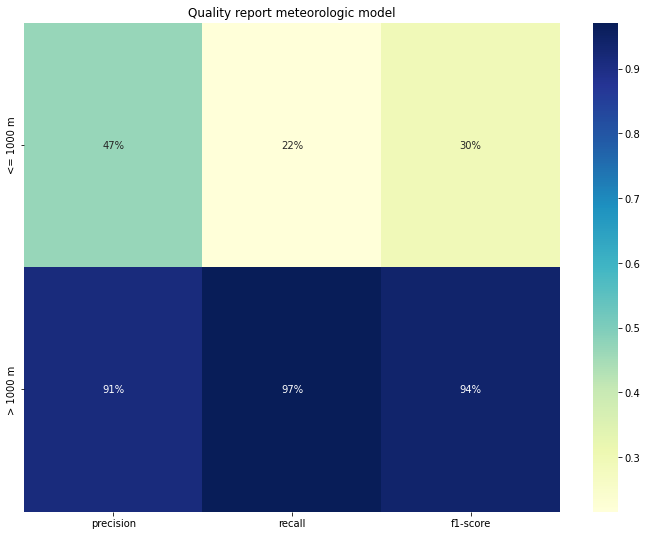

In [19]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all1k.vis_l, df_all1k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


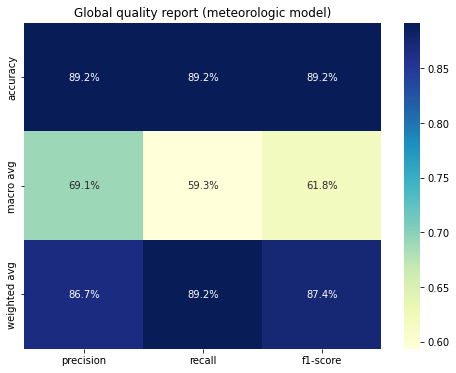

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

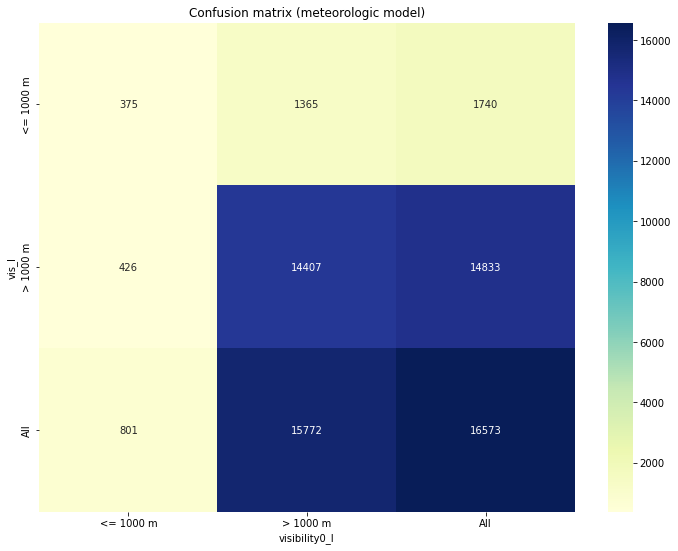

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")
import seaborn as sns
global_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

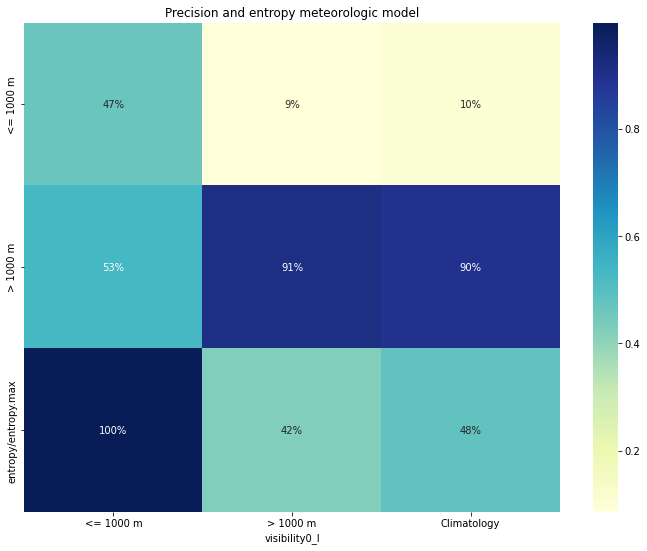

In [23]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [25]:
print("Confusion matrix (meteorologic model)\n")
for l in ["visibility0_l","visibility1_l"]:
  cm = pd.crosstab(df_all1k.vis_l, df_all1k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")

Confusion matrix (meteorologic model)

visibility0_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            375      1365   1740
> 1000 m             426     14407  14833
All                  801     15772  16573
Heidke Skill Score: 0.25


visibility1_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            468      1272   1740
> 1000 m             558     14275  14833
All                 1026     15547  16573
Heidke Skill Score: 0.28




In [27]:
model1k.drop(columns=["Unnamed: 0","visibility0_l","visibility1_l"])

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,6.723936,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,6.389383,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,6.182112,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,6.556708,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,7.131637,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,28.912556,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,21.361237,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,13.615123,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


**ML LGBMClassifier**

In [31]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = model1k.drop(columns=["Unnamed: 0","visibility0_l","visibility1_l"]).columns.to_list()  

# X and Y
Y = df_all1k.vis_l
X = df_all1k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=250).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        163       103   266
> 1000 m         111      2109  2220
All              274      2212  2486
Heidke Skill Score: 0.56

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.594891  0.612782  0.603704   266.000000
> 1000 m       0.953436  0.950000  0.951715  2220.000000
accuracy       0.913918  0.913918  0.913918     0.913918
macro avg      0.774163  0.781391  0.777709  2486.000000
weighted avg   0.915072  0.913918  0.914478  2486.000000

Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        178        99   277
> 1000 m         135      2074  2209
All              313      2173  2486
Heidke Skill Score: 0.55

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      s

,HSS
count,10.000000
mean,0.572561
std,0.013015
min,0.550215
25%,0.563208
50%,0.578242
75%,0.582385
max,0.586328


In [33]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEVX_1km_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])


In [36]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = model1k.drop(columns=["Unnamed: 0","visibility0_l","visibility1_l"]).columns.to_list()  

# X and Y
Y = df_all1k.vis_l
X = df_all1k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        184       106   290
> 1000 m         111      2085  2196
All              295      2191  2486
Heidke Skill Score: 0.58

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.623729  0.634483  0.629060   290.000000
> 1000 m       0.951620  0.949454  0.950536  2196.000000
accuracy       0.912711  0.912711  0.912711     0.912711
macro avg      0.787675  0.791968  0.789798  2486.000000
weighted avg   0.913371  0.912711  0.913034  2486.000000

Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        172        83   255
> 1000 m         112      2119  2231
All              284      2202  2486
Heidke Skill Score: 0.59

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      s

,HSS
count,10.000000
mean,0.583997
std,0.021194
min,0.552191
25%,0.578192
50%,0.583848
75%,0.593108
max,0.622366
